In [736]:
import pandas as pd
import numpy as np
import pricey as pr
import yfinance as yf
import FinanceDataReader as fdr
from sklearn.decomposition import PCA, KernelPCA, FastICA
from tqdm.notebook import tqdm
import statsmodels.api as sm
import itertools

from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.preprocessing import StandardScaler, MinMaxScaler#, Imputer
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [690]:
# univ = p.columns
univ = ['AGG', 'EEM', 'EMB', 'FXE', 'FXY', 'GLD', 'HYG', 'LQD', 'TLT', 'SPY', 'USO', 'UUP', 'VNQ']

In [691]:
p = pd.read_excel('pca.xlsx', sheet_name='Price', skiprows=[0], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14], index_col=0); 
p.columns = univ
p

,AGG,EEM,EMB,FXE,FXY,GLD,HYG,LQD,TLT,SPY,USO,UUP,VNQ
Date,,,,,,,,,,,,,
2007-06-22,71.912900,36.103000,259.153,127.523400,80.800000,64.780000,51.581500,68.5316,60.4772,123.2759,51.890000,24.578300,46.655900
2007-06-15,71.773600,36.372200,259.591,126.644400,80.980000,64.850000,51.751300,68.4193,60.4267,125.3394,51.530000,24.716200,48.674000
2007-06-08,71.641700,34.636200,259.113,126.379700,82.170000,64.220000,52.005900,68.4525,60.5061,123.1467,49.060000,24.667000,49.191400
2007-06-01,72.316200,35.743200,264.004,126.937400,82.000000,66.440000,52.485300,69.2103,61.7985,125.6253,49.460000,24.558600,51.138400
2007-05-25,72.536900,34.540100,264.653,127.020500,82.130000,64.940000,52.666300,69.6205,62.1180,123.6767,49.500000,24.538900,48.214700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-10-11,61.070155,7.769212,136.140,89.437555,91.202634,31.841434,31.021658,54.9300,51.0234,63.3529,25.878718,31.475738,17.126201
2002-10-04,61.364957,8.180205,137.374,88.624361,91.794635,32.188137,31.719926,55.7678,51.6758,60.8236,26.089461,31.578456,17.615849
2002-09-27,61.365519,8.209562,134.513,88.770975,92.401521,32.163014,32.317550,56.0832,51.7847,62.2915,26.891527,31.557912,18.261044


In [692]:
log_p = np.log(p).fillna(0)

In [693]:
log_p

,AGG,EEM,EMB,FXE,FXY,GLD,HYG,LQD,TLT,SPY,USO,UUP,VNQ
Date,,,,,,,,,,,,,
2007-06-22,4.275456,3.586376,5.557419,4.848300,4.391977,4.170997,3.943163,4.227295,4.102266,4.814425,3.949126,3.201864,3.842799
2007-06-15,4.273517,3.593805,5.559107,4.841383,4.394202,4.172077,3.946450,4.225655,4.101431,4.831025,3.942164,3.207459,3.885145
2007-06-08,4.271677,3.544899,5.557264,4.839291,4.408790,4.162315,3.951357,4.226140,4.102744,4.813376,3.893044,3.205466,3.895719
2007-06-01,4.281048,3.576360,5.575964,4.843694,4.406719,4.196299,3.960533,4.237150,4.123879,4.833304,3.901164,3.201062,3.934536
2007-05-25,4.284095,3.542121,5.578420,4.844348,4.408303,4.173464,3.963976,4.243059,4.129036,4.817671,3.901973,3.200260,3.875664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-10-11,4.112023,2.050169,4.913684,4.493541,4.513084,3.460768,3.434686,4.006060,3.932284,4.148721,3.253421,3.449217,2.840609
2002-10-04,4.116839,2.101717,4.922707,4.484407,4.519554,3.471598,3.456945,4.021197,3.944990,4.107978,3.261531,3.452475,2.868799
2002-09-27,4.116848,2.105300,4.901661,4.486060,4.526143,3.470817,3.475610,4.026836,3.947095,4.131825,3.291811,3.451824,2.904770


In [694]:
scaler = StandardScaler()
log_p_scaled = scaler.fit_transform(log_p); log_p_scaled

array([[ 1.5160939 ,  1.71135737,  1.32892523, ...,  0.28162683,
        -0.97386183,  1.2546891 ],
       [ 1.47450919,  1.72889623,  1.33850571, ...,  0.25966102,
        -0.89226957,  1.38162963],
       [ 1.43505911,  1.61343389,  1.32804949, ...,  0.10468055,
        -0.92132773,  1.41332699],
       ...,
       [-1.88557758, -1.78536616, -2.39138777, ..., -1.79228811,
         2.67135383, -1.55726544],
       [-1.90992674, -1.69527412, -2.32009517, ..., -1.86644819,
         2.67135383, -1.51413396],
       [-1.97900084, -1.60463243, -2.22731228, ..., -1.85164651,
         2.74305565, -1.47794367]])

In [695]:
log_p_scaled.shape

(250, 13)

In [696]:
reducer = PCA(n_components=0.95, random_state=0)
# reducer = FastICA(n_components=3, random_state=0)
comp = reducer.fit_transform(log_p_scaled); comp

array([[-4.71917258e+00, -1.45099219e+00, -1.16833286e+00],
       [-4.72719273e+00, -1.51002432e+00, -1.13541864e+00],
       [-4.60082661e+00, -1.36443075e+00, -1.19629445e+00],
       [-5.01878972e+00, -1.41610315e+00, -1.15157179e+00],
       [-4.97006345e+00, -1.33911749e+00, -1.10480594e+00],
       [-5.06572188e+00, -1.25207145e+00, -1.08154040e+00],
       [-5.18724975e+00, -1.22297829e+00, -1.07249112e+00],
       [-5.27595809e+00, -1.19907196e+00, -1.14028085e+00],
       [-5.23622485e+00, -1.03880509e+00, -1.05142584e+00],
       [-5.18122649e+00, -1.03107809e+00, -1.09256000e+00],
       [-4.96630068e+00, -1.08659942e+00, -1.00810129e+00],
       [-4.82330176e+00, -1.20082423e+00, -9.22261459e-01],
       [-4.86160045e+00, -9.78294214e-01, -7.31117306e-01],
       [-4.84286295e+00, -1.11331200e+00, -7.75762173e-01],
       [-4.71397677e+00, -9.83260043e-01, -7.84887534e-01],
       [-4.67710058e+00, -1.20025637e+00, -6.23165414e-01],
       [-4.71356991e+00, -9.53684252e-01

In [697]:
comp.shape

(250, 3)

In [698]:
reducer.explained_variance_

array([10.86666884,  1.34545597,  0.40144746])

In [699]:
comp_std = reducer.explained_variance_**0.5
# comp_std = [comp[:,0].std(), comp[:,1].std(), comp[:,2].std()]; comp_std

In [700]:
reducer.explained_variance_ratio_

array([0.83255401, 0.10308263, 0.03075705])

In [701]:
reducer.singular_values_

array([52.01731001, 18.30351156,  9.99802064])

In [702]:
np.diag(reducer.get_covariance())

array([1.01707393, 1.01582144, 1.03451738, 1.01834337, 0.9996096 ,
       0.97122125, 1.03043858, 0.99988184, 0.93878102, 1.0105034 ,
       0.96207833, 1.02616974, 1.02776893])

In [703]:
reducer.components_.T

array([[-0.29895783, -0.06658499, -0.01998975],
       [-0.29749075, -0.10391562,  0.01460477],
       [-0.30231992, -0.02842173,  0.03454573],
       [-0.26567248,  0.32954644, -0.44001153],
       [ 0.13255387,  0.76433854,  0.12031011],
       [-0.2813283 , -0.21677874, -0.16397186],
       [-0.30096285,  0.06651393, -0.03745372],
       [-0.29625148,  0.06861504,  0.00876047],
       [-0.27675544, -0.0812591 ,  0.40053157],
       [-0.29782863, -0.03918487, -0.113886  ],
       [-0.24823695,  0.23455301,  0.70887861],
       [ 0.26245309, -0.39797412,  0.29283238],
       [-0.29880742, -0.11611964,  0.00935349]])

In [704]:
_sign = np.sign(reducer.components_.T.max(axis=1) + reducer.components_.T.min(axis=1))

In [705]:
X_clust = reducer.components_.T * np.reshape(_sign, (13,1)); X_clust

array([[ 0.29895783,  0.06658499,  0.01998975],
       [ 0.29749075,  0.10391562, -0.01460477],
       [ 0.30231992,  0.02842173, -0.03454573],
       [ 0.26567248, -0.32954644,  0.44001153],
       [ 0.13255387,  0.76433854,  0.12031011],
       [ 0.2813283 ,  0.21677874,  0.16397186],
       [ 0.30096285, -0.06651393,  0.03745372],
       [ 0.29625148, -0.06861504, -0.00876047],
       [-0.27675544, -0.0812591 ,  0.40053157],
       [ 0.29782863,  0.03918487,  0.113886  ],
       [-0.24823695,  0.23455301,  0.70887861],
       [-0.26245309,  0.39797412, -0.29283238],
       [ 0.29880742,  0.11611964, -0.00935349]])

In [706]:
km = KMeans(n_clusters=4, random_state=0).fit(X_clust)
pd.DataFrame({'asset': univ, 'cluster': km.labels_}).sort_values('cluster')

,asset,cluster
0,AGG,0
1,EEM,0
2,EMB,0
5,GLD,0
6,HYG,0
7,LQD,0
9,SPY,0
12,VNQ,0
8,TLT,1
10,USO,1


In [717]:
# hedger = reducer.components_.T * (reducer.explained_variance_**0.5) * np.reshape(log_p.std().values, (13,1)); 
hedger = reducer.components_.T * comp_std * np.reshape(log_p.std().values * (52**0.5), (13,1)); 
# hedger = np.reshape(hedger[:,:1], (13,2)); hedger
hedger = hedger[:, :3]; hedger

array([[-3.32018050e-01, -2.60204381e-02, -4.26702602e-03],
       [-3.00130300e+00, -3.68895840e-01,  2.83202559e-02],
       [-1.26926105e+00, -4.19876210e-02,  2.78769173e-02],
       [-5.42873107e-01,  2.36949011e-01, -1.72815204e-01],
       [ 2.31544246e-01,  4.69800923e-01,  4.03933481e-02],
       [-1.52914231e+00, -4.14608014e-01, -1.71304962e-01],
       [-8.65328563e-01,  6.72925992e-02, -2.06980414e-02],
       [-4.19697627e-01,  3.42043873e-02,  2.38544610e-03],
       [-5.15871366e-01, -5.32971233e-02,  1.43498758e-01],
       [-1.23872155e+00, -5.73471898e-02, -9.10424025e-02],
       [-1.87399805e+00,  6.23060529e-01,  1.02858627e+00],
       [ 4.28666830e-01, -2.28722848e-01,  9.19291889e-02],
       [-2.37421328e+00, -3.24653862e-01,  1.42846076e-02]])

In [859]:
assets = ['AGG', 'GLD', 'EEM', 'USO']

In [866]:
def get_w(_assets):
    b = hedger[univ.index(_assets[0])]
    B = hedger[[univ.index(_assets[1]),univ.index(_assets[2]), univ.index(_assets[3])]]
    w = b @ np.linalg.inv(B)
    w = np.insert(w, 0, -1)
    
    wp = w[w>0].sum()
    wm = -w[w<0].sum()
    return w / max(wp, wm)

def get_spread(_assets, _w):
    log_p_basket = log_p[_assets][::-1].diff().fillna(0) @ _w
    sp = log_p_basket.cumsum()
    return (sp - sp.mean()) / sp.std()

def get_halflife(s):
    _lag = np.roll(s, 1)
    _lag[0] = 0
    _ret = s - _lag
    _ret[0] = 0

    _lag2 = sm.add_constant(_lag)

    _model = sm.OLS(_ret, _lag2)
    res = _model.fit()

    return -np.log(2) / res.params[1]


def get_profit_threshold(s):
    s0 = np.linspace(0, max(s), 50)
    f_bar = np.array([None]*50)
    for i in range(50):
        f_bar[i] = len(s.values[s.values > s0[i]]) / s.shape[0]
        
    D = np.zeros((49, 50))
    for i in range(D.shape[0]):
        D[i,i] = 1
        D[i,i+1] = -1
        
    I = 1.0
    f_star = np.linalg.inv(np.eye(50) + I * D.T@D) @ f_bar.reshape(-1, 1)
    s_star = [f_star[i] * s0[i] for i in range(50)]
    max_profit = max(s_star)[0]
    
    return {
        'profit': max_profit,
        'threshold': s0[s_star.index(max_profit)]
    }

def proc(_assets):
    _w = get_w(_assets)
    _sp = get_spread(_assets, _w)
    _hl = get_halflife(_sp)
    _pt = get_profit_threshold(_sp)
    
    return {
        'assets': _assets,
        'w': _w,
        'sp': _sp,
        'halflife': _hl,
        'profit': _pt['profit'],
        'threshold': _pt['threshold']
    }

In [860]:
w = get_w(assets); w

array([-1.        , -0.30109655,  0.30314376, -0.0626408 ])

In [861]:
sp = get_spread(assets, w); sp

Date
2002-09-13    1.194877
2002-09-20    0.454054
2002-09-27   -0.046644
2002-10-04   -0.022375
2002-10-11   -0.314597
                ...   
2007-05-25    0.722307
2007-06-01    0.996245
2007-06-08    1.435069
2007-06-15    1.724283
2007-06-22    1.545772
Length: 250, dtype: float64

In [862]:
hl = get_halflife(sp); hl

5.374959538147008

In [863]:
w = proc(assets)['w']; w

array([-1.        , -0.30109655,  0.30314376, -0.0626408 ])

In [864]:
wp = w[w>0].sum()
wm = -w[w<0].sum()
max(wp, wm)

1.3637373539411963

In [865]:
w / max(wp, wm)

array([-0.73327903, -0.22078779,  0.22228896, -0.04593319])

In [867]:
assets_comb = list(itertools.combinations(univ, 4))

In [868]:
output = []
for _assets in tqdm(assets_comb):
    output.append(proc(list(_assets)))

  0%|          | 0/715 [00:00<?, ?it/s]

In [869]:
df = pd.DataFrame(output).sort_values('profit'); df

,assets,w,sp,halflife,profit,threshold
359,"[EEM, HYG, SPY, USO]","[-0.17559531846589016, -0.8244046815341098, 0....",Date 2002-09-13 1.701930 2002-09-20 -0.00...,3.803817,0.105373,0.563734
21,"[AGG, EEM, FXY, LQD]","[-0.8575028405471863, -0.02188303877046975, -0...",Date 2002-09-13 -1.435945 2002-09-20 -0.95...,6.171618,0.106935,0.635671
66,"[AGG, EMB, FXY, LQD]","[-0.8530104213460022, -0.04187429275891867, -0...",Date 2002-09-13 -0.918217 2002-09-20 -0.38...,4.800292,0.111741,0.545927
153,"[AGG, FXY, LQD, VNQ]","[-0.8453558457929486, -0.12415265737831355, 0....",Date 2002-09-13 -1.715976 2002-09-20 -1.28...,5.791878,0.111857,0.562831
259,"[EEM, EMB, SPY, USO]","[-0.1493486002400834, 1.0, -0.5538523254615924...",Date 2002-09-13 -2.722829 2002-09-20 -2.03...,6.526452,0.118100,0.387241
...,...,...,...,...,...,...
382,"[EEM, SPY, USO, VNQ]","[-0.7414048911765749, 0.12272028518064385, 0.0...",Date 2002-09-13 0.680489 2002-09-20 0.90...,7.855781,0.211113,0.719745
94,"[AGG, EMB, SPY, USO]","[-0.8838842229241757, 0.35537204022847735, -0....",Date 2002-09-13 -2.092715 2002-09-20 -2.48...,8.638430,0.211393,1.128552
318,"[EEM, FXY, LQD, VNQ]","[-0.5846949887743544, 0.14221231508456475, -0....",Date 2002-09-13 1.080222 2002-09-20 1.29...,7.030573,0.211677,0.756461
59,"[AGG, EMB, FXE, TLT]","[-0.7685407839277931, 0.2965679892642694, -0.0...",Date 2002-09-13 -0.944020 2002-09-20 -1.71...,7.617886,0.212128,0.928553


<AxesSubplot:xlabel='profit', ylabel='halflife'>

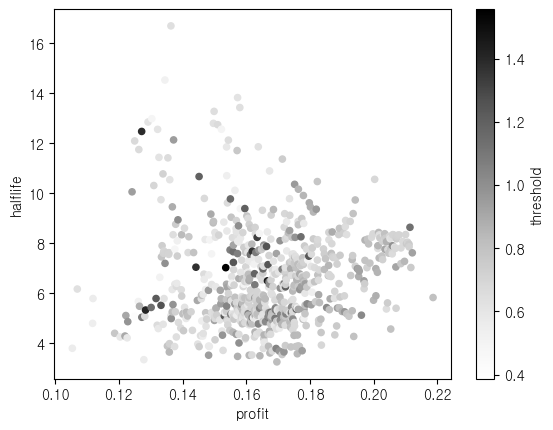

In [870]:
df.plot.scatter(x='profit', y='halflife', c='threshold')

<AxesSubplot:xlabel='Date'>

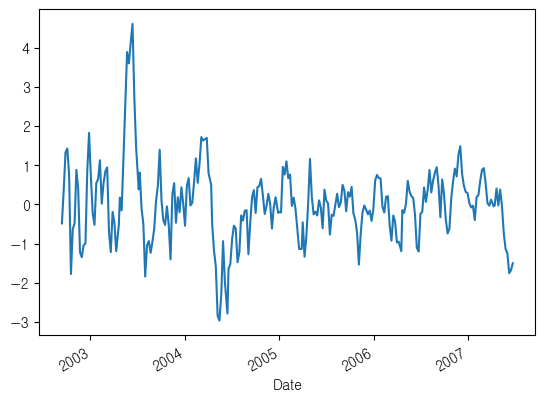

In [821]:
z = (sp - sp.mean()) / sp.std()
z.plot()

In [834]:
def profit_threshold(s):
    s0 = np.linspace(0, max(s), 50)
    f_bar = np.array([None]*50)
    for i in range(50):
        f_bar[i] = len(s.values[s.values > s0[i]]) / s.shape[0]
        
    D = np.zeros((49, 50))
    for i in range(D.shape[0]):
        D[i,i] = 1
        D[i,i+1] = -1
        
    I = 1.0
    f_star = np.linalg.inv(np.eye(50) + I * D.T@D) @ f_bar.reshape(-1, 1)
    s_star = [f_star[i] * s0[i] for i in range(50)]
    max_profit = max(s_star)[0]
    
    return {
        'profit': max_profit,
        'threshold': s0[s_star.index(max_profit)]
    }

In [835]:
profit_threshold(z)

{'profit': 0.12783130770209347, 'threshold': 0.5640766833642608}

In [822]:
s0 = np.linspace(0, max(z), 50)
f_bar = np.array([None]*50)
for i in range(50):
    f_bar[i] = len(z.values[z.values > s0[i]]) / z.shape[0]

In [823]:
f_bar

array([0.484, 0.432, 0.388, 0.344, 0.3, 0.264, 0.224, 0.188, 0.156, 0.124,
       0.104, 0.092, 0.08, 0.068, 0.064, 0.056, 0.044, 0.044, 0.036,
       0.028, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024,
       0.02, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016,
       0.016, 0.016, 0.012, 0.012, 0.012, 0.008, 0.008, 0.004, 0.004,
       0.004, 0.004, 0.004, 0.0], dtype=object)

In [825]:
D = np.zeros((49, 50))
for i in range(D.shape[0]):
    D[i,i] = 1
    D[i,i+1] = -1

In [826]:
I = 1.0
f_star = np.linalg.inv(np.eye(50) + I * D.T@D) @ f_bar.reshape(-1, 1)
s_star = [f_star[i] * s0[i] for i in range(50)]

In [827]:
np.linalg.inv(D.T @ D + np.eye(50))

array([[6.18033989e-01, 2.36067977e-01, 9.01699437e-02, ...,
        1.41153282e-20, 5.64613129e-21, 2.82306565e-21],
       [2.36067977e-01, 4.72135955e-01, 1.80339887e-01, ...,
        2.82306565e-20, 1.12922626e-20, 5.64613129e-21],
       [9.01699437e-02, 1.80339887e-01, 4.50849719e-01, ...,
        7.05766412e-20, 2.82306565e-20, 1.41153282e-20],
       ...,
       [1.41153282e-20, 2.82306565e-20, 7.05766412e-20, ...,
        4.50849719e-01, 1.80339887e-01, 9.01699437e-02],
       [5.64613129e-21, 1.12922626e-20, 2.82306565e-20, ...,
        1.80339887e-01, 4.72135955e-01, 2.36067977e-01],
       [2.82306565e-21, 5.64613129e-21, 1.41153282e-20, ...,
        9.01699437e-02, 2.36067977e-01, 6.18033989e-01]])

In [829]:
threshold = s0[s_star.index(max(s_star))]; threshold

0.5640766833642608

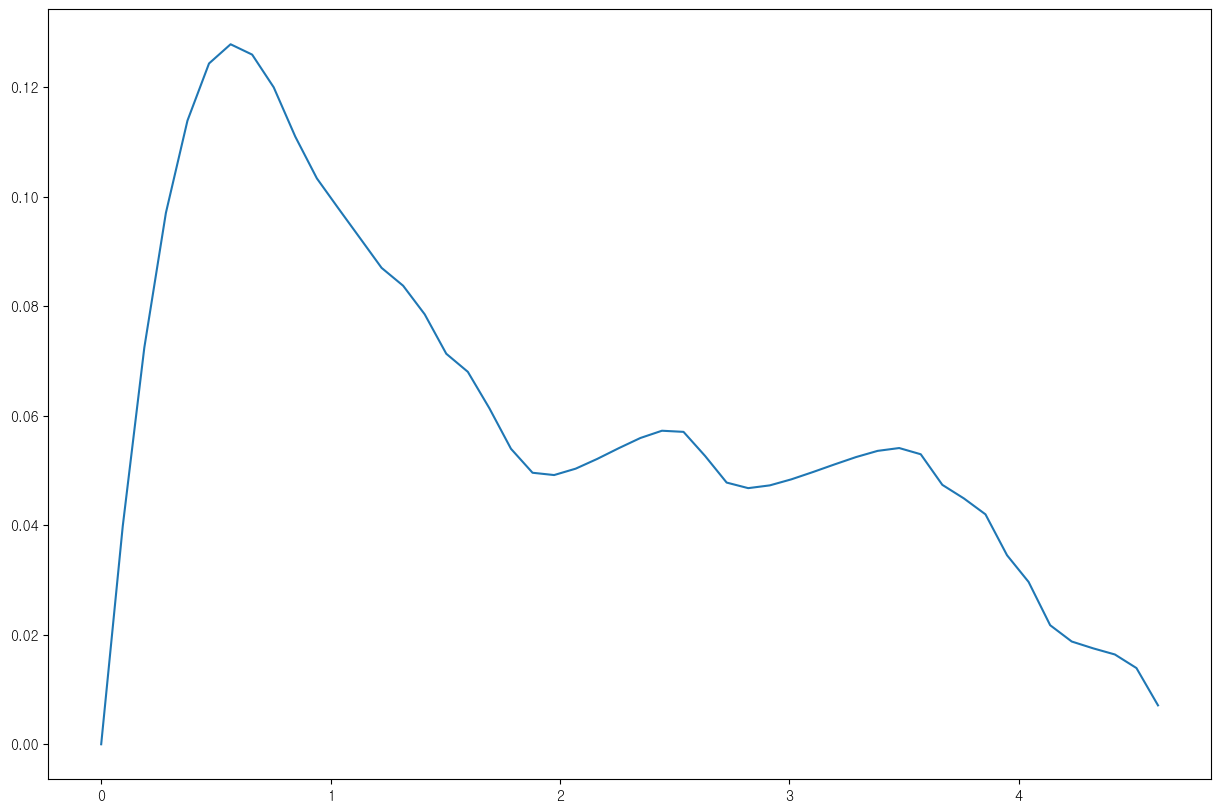

In [830]:
plt.figure(figsize=(15,10))
plt.plot(s0, s_star)

<AxesSubplot:xlabel='Date'>

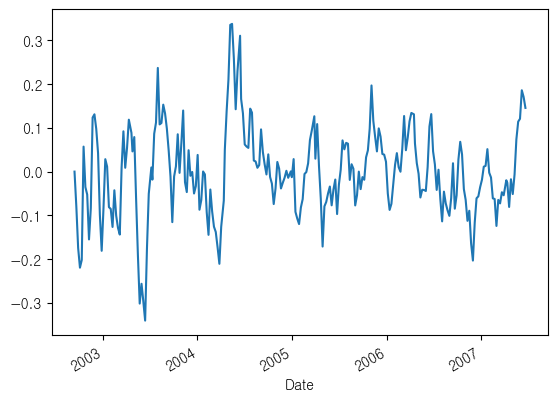

In [800]:
__assets = df['assets'].iloc[2]
sp = get_spread(__assets, get_w(__assets))
sp.plot()

<AxesSubplot:xlabel='Date'>

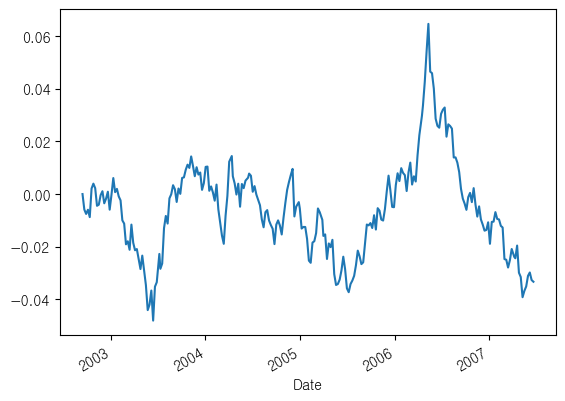

In [787]:
__assets = df['assets'].iloc[-1]
sp = get_spread(__assets, get_w(__assets))
sp.plot()

<AxesSubplot:xlabel='Date'>

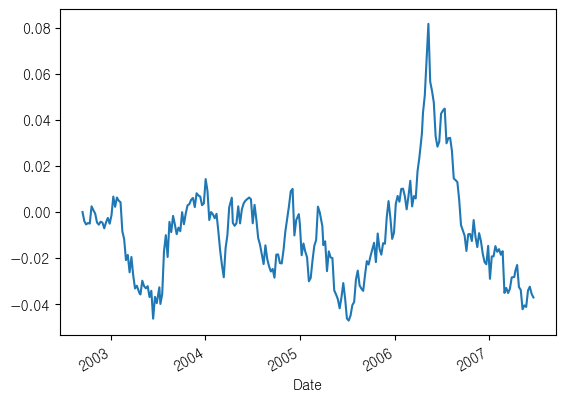

In [788]:
__assets = df['assets'].iloc[-2]
sp = get_spread(__assets, get_w(__assets))
sp.plot()

In [796]:
proc(['SPY','EEM','GLD','TLT'])

{'assets': ['SPY', 'EEM', 'GLD', 'TLT'],
 'w': array([-1.        ,  0.89555123, -0.48048552, -1.3847799 ]),
 'sp': Date
 2002-09-13    0.000000
 2002-09-20    0.008971
 2002-09-27   -0.014115
 2002-10-04    0.009064
 2002-10-11   -0.055045
                 ...   
 2007-05-25   -0.002773
 2007-06-01    0.008426
 2007-06-08    0.045775
 2007-06-15    0.069051
 2007-06-22    0.078360
 Length: 250, dtype: float64,
 'halflife': 5.78282234701457}

In [797]:
proc(['TLT','SPY','EEM','GLD'])

{'assets': ['TLT', 'SPY', 'EEM', 'GLD'],
 'w': array([-1.        , -0.72213642,  0.64671016, -0.34697609]),
 'sp': Date
 2002-09-13    0.000000
 2002-09-20    0.006478
 2002-09-27   -0.010193
 2002-10-04    0.006546
 2002-10-11   -0.039750
                 ...   
 2007-05-25   -0.002003
 2007-06-01    0.006084
 2007-06-08    0.033056
 2007-06-15    0.049864
 2007-06-22    0.056587
 Length: 250, dtype: float64,
 'halflife': 5.782822347014573}

In [798]:
proc(['GLD','TLT','SPY','EEM'])

{'assets': ['GLD', 'TLT', 'SPY', 'EEM'],
 'w': array([-1.        , -2.88204294, -2.08122817,  1.86384644]),
 'sp': Date
 2002-09-13    0.000000
 2002-09-20    0.018670
 2002-09-27   -0.029376
 2002-10-04    0.018865
 2002-10-11   -0.114562
                 ...   
 2007-05-25   -0.005772
 2007-06-01    0.017536
 2007-06-08    0.095267
 2007-06-15    0.143710
 2007-06-22    0.163086
 Length: 250, dtype: float64,
 'halflife': 5.782822347014574}

In [799]:
-1/2.08122817, -2.88204294/2.08122817, 1.8638644/2.08122817

(-0.48048552023971497, -1.3847799013790976, 0.8955598558902842)

In [718]:
b = hedger[univ.index('VNQ')]; b

array([-2.37421328, -0.32465386,  0.01428461])

In [720]:
B = hedger[[univ.index('GLD'),univ.index('EEM'), univ.index('USO')]]; B

array([[-1.52914231, -0.41460801, -0.17130496],
       [-3.001303  , -0.36889584,  0.02832026],
       [-1.87399805,  0.62306053,  1.02858627]])

In [672]:
w = b @ np.linalg.inv(B)
w = np.insert(w, 0, -1); w

array([-1.        ,  0.37188901,  0.56393722,  0.06029654])

<AxesSubplot:xlabel='Date'>

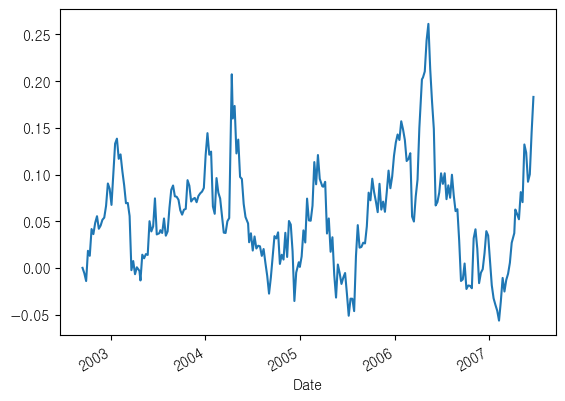

In [673]:
# log_p_basket = log_p[['VNQ US', 'SPY US', 'EEM US', 'TLT US']][::-1].diff().fillna(0) @ w
log_p_basket = log_p[['VNQ US', 'GLD US', 'EEM US', 'USO US']][::-1].diff().fillna(0) @ w
log_p_basket_cum = log_p_basket.cumsum()
log_p_basket_cum.plot()

<AxesSubplot:xlabel='Date'>

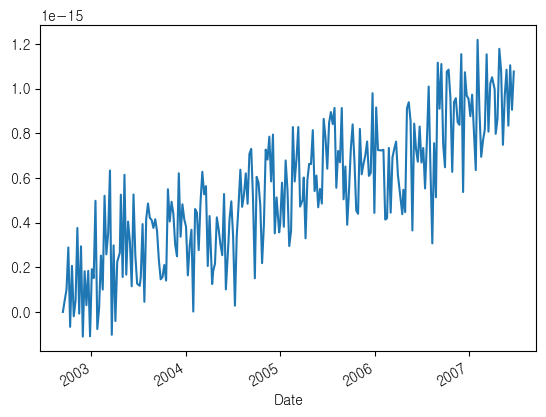

In [675]:
log_p_basket_model = scaler.inverse_transform(reducer.inverse_transform(comp))
log_p_basket_model = pd.DataFrame(log_p_basket_model, index=p.index, columns=p.columns)
log_p_basket_model = log_p_basket_model[['VNQ US', 'GLD US', 'EEM US', 'USO US']][::-1].diff().fillna(0)
log_p_basket_model = log_p_basket_model @ w
log_p_basket_model_cum = log_p_basket_model.cumsum()
log_p_basket_model_cum.plot()

<AxesSubplot:xlabel='Date'>

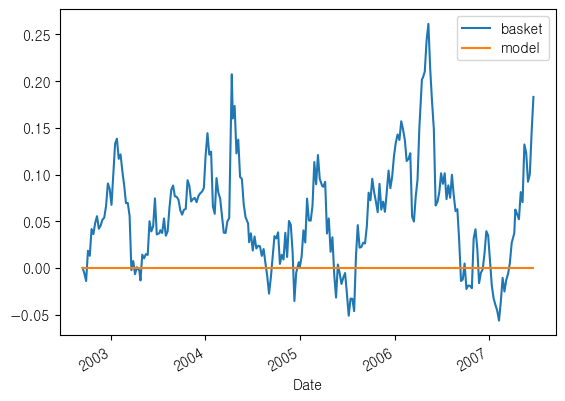

In [676]:
pd.DataFrame({'basket': log_p_basket_cum, 'model': log_p_basket_model_cum}).plot()

In [682]:
z = log_p_basket_cum; 
# z = z - z.mean(); z

In [684]:
def get_halflife(s):
    _lag = np.roll(s, 1)
    _lag[0] = 0
    _ret = s - _lag
    _ret[0] = 0

    _lag2 = sm.add_constant(_lag)

    _model = sm.OLS(_ret, _lag2)
    res = _model.fit()

    return -np.log(2) / res.params[1]

In [685]:
get_halflife(z)

7.60846015728235